<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/PCA_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA


%matplotlib inline - Ensures that plots are displayed within the notebook.

numpy - Used for array and matrix operations.

matplotlib.pyplot - For creating visualizations.

seaborn - For enhanced plot aesthetics.

sklearn.decomposition.PCA - For performing Principal Component Analysis.

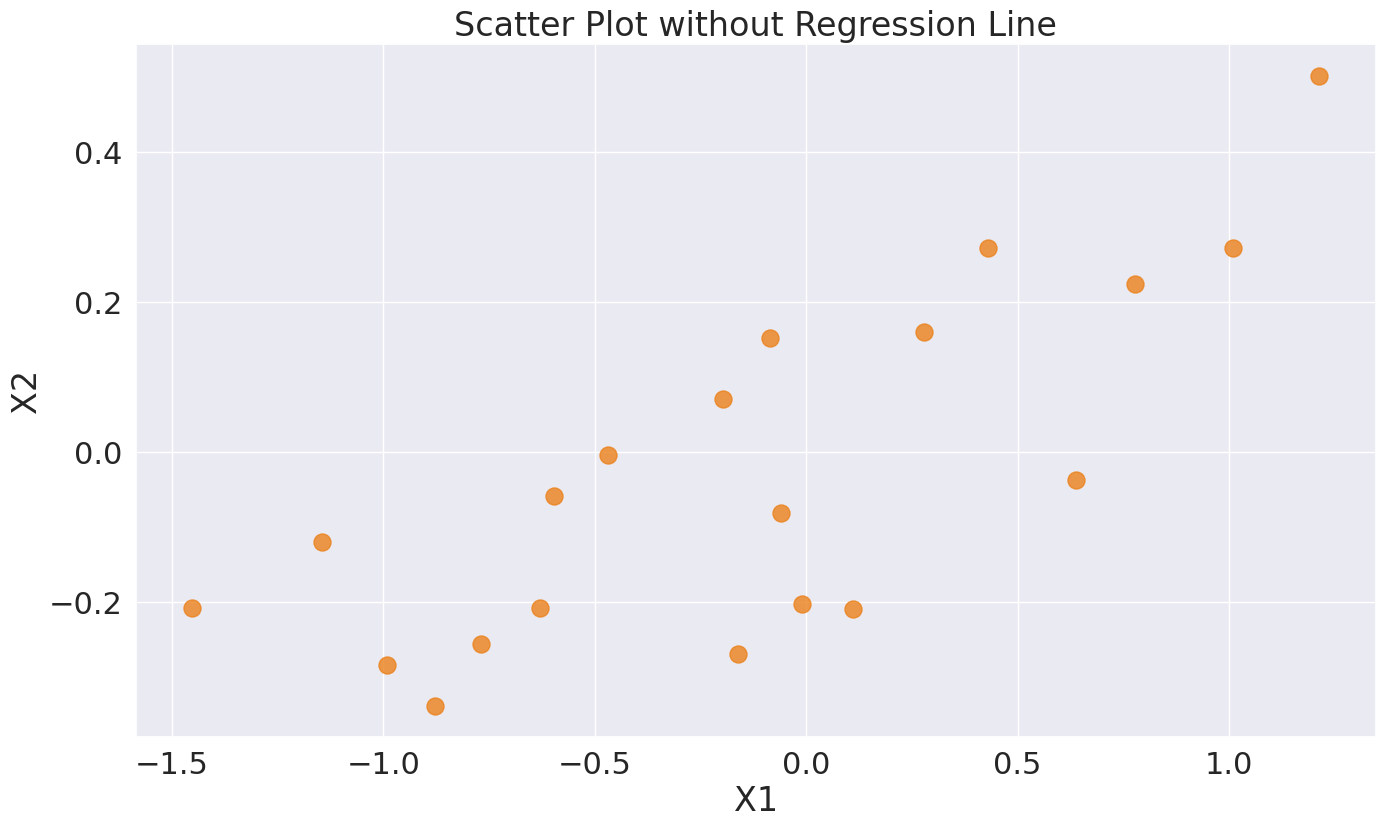

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 20))).T

fig = plt.figure(figsize=(16, 9))

sns.set(font_scale=2)
sns.regplot(x=X[:, 0], y=X[:, 1], color='#EB811B', line_kws={'color': 'green'}, ci=None, scatter_kws={'s':150}, truncate=True, fit_reg=False)

plt.title("Scatter Plot without Regression Line")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


Sets the random seed for reproducibility.

Generates a 20x2 matrix of random data:

np.random.random(size=(2, 2)) generates a 2x2 matrix of random numbers (between 0 and 1).

np.random.normal(size=(2, 20)) generates a 2x20 matrix of normally distributed random numbers.

np.dot() multiplies these matrices, resulting in a 20x2 matrix, which is then transposed.Creates a large figure for the scatter plot.

sns.set() - Sets the font size for the plot.

sns.regplot() - Creates a scatter plot:

x=X[:, 0], y=X[:, 1] - Uses the first and second columns of X as the x and y coordinates.

color='#EB811B' - Sets the color of the points.

scatter_kws={'s':150} - Sets the point size.

line_kws={'color': 'green'} - Sets the line color (though no line is drawn here because fit_reg=False).

Adds labels and title for clarity.

In [4]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.56712452 0.02009023]
[[ 0.96913439  0.24653303]
 [-0.24653303  0.96913439]]


1. PCA Model Initialization
python
Copy
Edit
pca = PCA(n_components=2)
Creates a PCA model object.

n_components=2 - Specifies that you want to reduce the data to 2 principal components.

This means that the PCA model will find the two orthogonal vectors (principal components) that capture the maximum variance in the data.

2. Fitting the PCA Model
python
Copy
Edit
pca.fit(X)
Fits the PCA model to the data X.

During this step, PCA:

Centers the data by subtracting the mean of each feature.

Calculates the covariance matrix of the centered data.

Finds the eigenvalues and eigenvectors of this covariance matrix.

Orders the eigenvectors by their corresponding eigenvalues (largest first), which represent the directions of maximum variance.

3. Printing the Explained Variance
python
Copy
Edit
print(pca.explained_variance_)
Outputs the amount of variance captured by each of the 2 principal components.

These values are the eigenvalues of the covariance matrix.

Higher values indicate components that capture more variation in the data.

4. Printing the PCA Components (Eigenvectors)
python
Copy
Edit
print(pca.components_)
Prints the eigenvectors that define the directions of maximum variance.

Each row is a principal component, and each column corresponds to a feature (or dimension) in the original data.

These vectors are unit vectors (length 1), representing the directions of the principal axes.

Example Output (Typical)
If you run this on a random 2D dataset like:

plaintext
Copy
Edit
[1.29593929 0.42943056]
[[ 0.87775909 -0.47908965]
 [ 0.47908965  0.87775909]]
explained_variance_:

1.29593929 - First principal component captures the most variance.

0.42943056 - Second principal component captures less variance.

components_:

The first row is the direction of the first principal component.

The second row is the direction of the second principal component.

What These Values Mean in Practice:
The explained_variance_ values indicate how much of the original data variance is captured by each principal component.

The components_ matrix indicates the directions in the original feature space that best explain the data's variation.

Visual Interpretation:
If you plot these vectors on your original data, they represent the directions along which the data varies the most.

The first component usually aligns with the longest spread in the data, while the second component is orthogonal to the first.

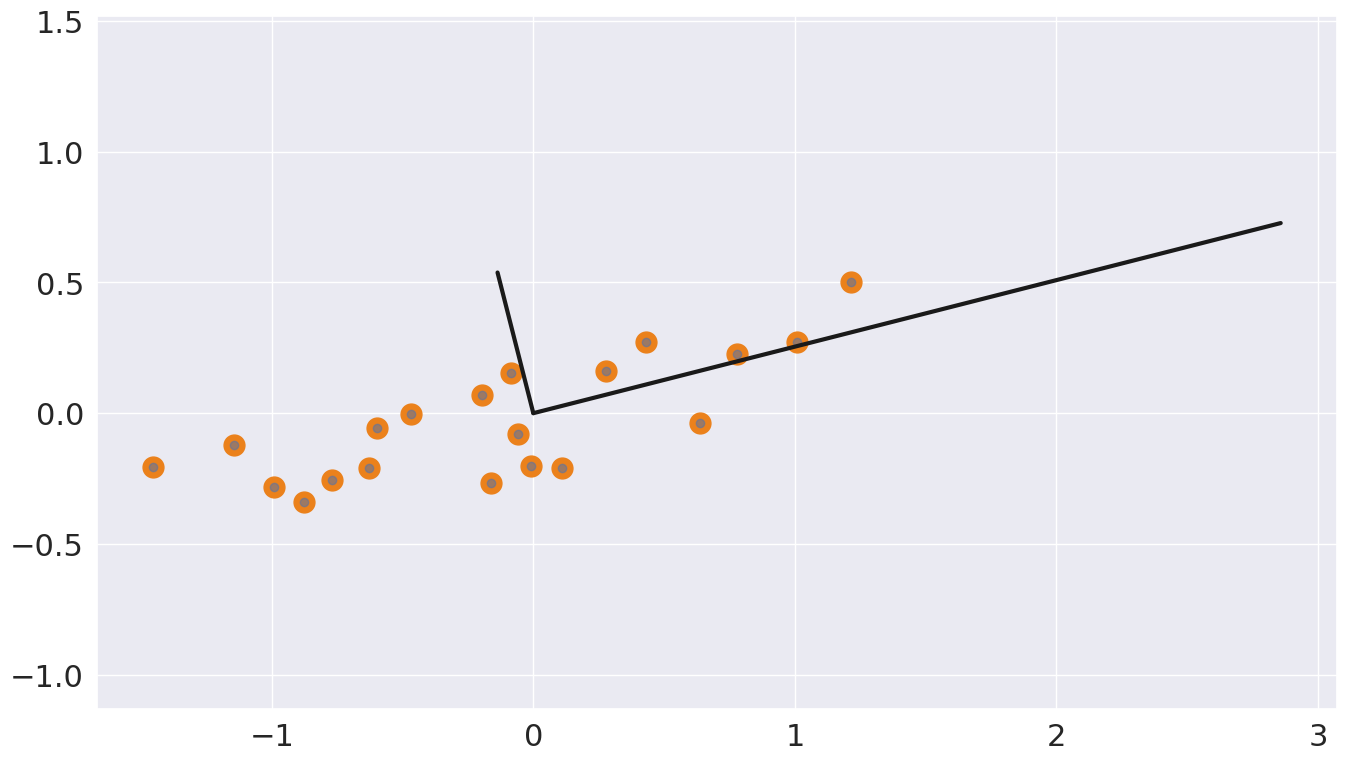

In [5]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 20))).T

fig = plt.figure(figsize=(16,9))
plt.plot(X[:, 0], X[:, 1], 'o',color='#EB811B',markersize=15)
plt.axis('equal');

plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_ratio_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

Regenerates the same random data for consistency.

Plots the raw data as orange circles.

plt.axis('equal') - Ensures equal scaling on both axes for accurate PCA visualization Overlays the same data with a lower opacity to distinguish it from the PCA vectors.

Calculates the principal component vectors:

pca.explained_variance_ratio_ - The proportion of variance explained by each component.

pca.components_ - The direction vectors of the principal components.

Scales the vectors based on the square root of their explained variance to visualize their relative importance.

Draws the PCA directions as black lines.

